# WIDS Datathon June 2024
### Primary Goal: Predict the metastatic diagnosis period using the provided characteristics and info about patient



## 1. Understand the Data
- included in Readme.md

## 2. Acquire & Inspect the Data
- Step 1: Import relevant modules

In [41]:
#Clear Cache
import streamlit as st

#Commands
st.cache_data.clear()
st.cache_resource.clear()

#Pre-Processing Data Modules
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer

#Encoding Modules 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

#Feature Scaling Modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#Feature Engineering Modules
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

#Modeling Modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Plotting Modules
import matplotlib.pyplot as plt
import seaborn as sns

#Export Modules
import csv

2024-06-19 18:41:52.492 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


- Step 2: Read Data into Script

In [42]:
diag_prd_train = pd.read_csv("/Users/anuroxstar/Documents/DataScientist_MachineLearning/WIDS_Datathon_June2024/widsdatathon2024-challenge2/train.csv",
                             skipinitialspace = True)

diag_prd_test = pd.read_csv("/Users/anuroxstar/Documents/DataScientist_MachineLearning/WIDS_Datathon_June2024/widsdatathon2024-challenge2/test.csv",
                            skipinitialspace = True)


- Step 3: Preview Dataset

- preview first 5 rows & # of columns and data types

In [43]:
print(diag_prd_train.head())
print(diag_prd_test.head())

   patient_id patient_race  payer_type patient_state  patient_zip3   Region  \
0      268700          NaN  COMMERCIAL            AR           724    South   
1      484983        White         NaN            IL           629  Midwest   
2      277055          NaN  COMMERCIAL            CA           925     West   
3      320055     Hispanic    MEDICAID            CA           900     West   
4      190386          NaN  COMMERCIAL            CA           934     West   

             Division  patient_age patient_gender    bmi  ...  \
0  West South Central           39              F    NaN  ...   
1  East North Central           55              F  35.36  ...   
2             Pacific           59              F    NaN  ...   
3             Pacific           59              F    NaN  ...   
4             Pacific           71              F    NaN  ...   

  Average of Apr-18 Average of May-18 Average of Jun-18 Average of Jul-18  \
0             52.55             74.77             79.96  


- preview column length, data types and counts of column info of dataset

In [44]:
print(diag_prd_train.info())
print(diag_prd_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13173 entries, 0 to 13172
Columns: 152 entries, patient_id to metastatic_diagnosis_period
dtypes: float64(137), int64(4), object(11)
memory usage: 15.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5646 entries, 0 to 5645
Columns: 151 entries, patient_id to Average of Dec-18
dtypes: float64(137), int64(3), object(11)
memory usage: 6.5+ MB
None



- preview # of rows and columns

In [45]:
print(diag_prd_train.shape)
print(diag_prd_test.shape)

(13173, 152)
(5646, 151)


- preview names of columns


In [46]:
print(diag_prd_train.columns)
print(diag_prd_test.columns)

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'bmi',
       ...
       'Average of Apr-18', 'Average of May-18', 'Average of Jun-18',
       'Average of Jul-18', 'Average of Aug-18', 'Average of Sep-18',
       'Average of Oct-18', 'Average of Nov-18', 'Average of Dec-18',
       'metastatic_diagnosis_period'],
      dtype='object', length=152)
Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'bmi',
       ...
       'Average of Mar-18', 'Average of Apr-18', 'Average of May-18',
       'Average of Jun-18', 'Average of Jul-18', 'Average of Aug-18',
       'Average of Sep-18', 'Average of Oct-18', 'Average of Nov-18',
       'Average of Dec-18'],
      dtype='object', length=151)


## 3. Data Cleaning

- Step 1. Remove duplicates

- Drop Duplicates


In [47]:
diag_prd_train.drop_duplicates()
diag_prd_test.drop_duplicates()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,F,32.33,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13
3,907331,NaN,COMMERCIAL,TN,373,South,East South Central,63,F,27.07,...,47.57,53.50,71.31,75.20,76.96,75.78,74.87,61.06,44.31,42.83
4,208382,Asian,NaN,WA,980,West,Pacific,62,F,NaN,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5641,649011,White,NaN,CO,800,West,Mountain,63,F,NaN,...,43.24,48.85,61.47,72.59,74.94,72.44,67.41,49.12,38.81,33.29
5642,869024,NaN,COMMERCIAL,GA,300,South,South Atlantic,57,F,40.00,...,50.20,56.76,72.53,77.56,78.82,77.39,78.71,64.14,47.25,44.86
5643,304800,Asian,COMMERCIAL,CA,914,West,Pacific,44,F,NaN,...,59.25,62.98,63.26,67.57,76.04,75.15,71.05,68.75,65.27,59.42
5644,267406,White,MEDICARE ADVANTAGE,CA,906,West,Pacific,66,F,31.79,...,60.26,64.84,64.40,69.37,78.29,77.42,73.15,70.26,65.92,59.39



- Remove any duplicate patient id's, assuming patient id is the primary key


In [48]:
diag_prd_train = diag_prd_train.drop_duplicates(subset = ['patient_id'], keep = 'first')
diag_prd_test = diag_prd_test.drop_duplicates(subset = ['patient_id'], keep = 'first')

- Step 2. Missing/ Incomplete Data?

- Determine % Missing Data
- Determine which columns have more than 60% missing data & drop those columns


In [49]:
na_counts_60 = diag_prd_train.columns[(diag_prd_train.isna().sum()/len(diag_prd_train) * 100) > 60]
# print(na_counts_60)
diag_prd_train.drop(['bmi', 'metastatic_first_novel_treatment',
                     'metastatic_first_novel_treatment_type'], axis =1, inplace = True)
diag_prd_test.drop(['bmi', 'metastatic_first_novel_treatment',
                     'metastatic_first_novel_treatment_type'], axis =1, inplace = True)

- Drop all rows with more than 2 data points missing


In [50]:
#print(diag_prd_train.isna().sum())
diag_prd_train = diag_prd_train[diag_prd_train.isnull().sum(axis=1) < 2]

In [51]:
# patient_race
# print(diag_prd_train['patient_race'].isna().sum()/len(diag_prd_train) * 100)
# more than 50% missing data and can't be imputed, drop patient_race
diag_prd_train.drop(['patient_race'], axis =1, inplace= True)
diag_prd_test.drop(['patient_race'], axis =1, inplace= True)

- Find which columns have less than 60% missing data

In [52]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isna().sum()
        mis_val_percent = 100 * df.isna().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        print(mz_table)
        return mz_table

null_table = missing_zero_values_table(diag_prd_train)

Your selected dataframe has 148 columns and 12143 Rows.
There are 7 columns that have missing values.
                   Zero Values  Missing Values  % of Total Values  \
payer_type                   0            1070                8.8   
Average of Oct-13            0              27                0.2   
Average of Jul-17            0               5                0.0   
Average of Jan-15            0               3                0.0   
Average of Jan-17            0               3                0.0   
Average of Dec-15            0               1                0.0   
Average of Sep-17            0               1                0.0   

                   Total Zero Missing Values  % Total Zero Missing Values  \
payer_type                              1070                          8.8   
Average of Oct-13                         27                          0.2   
Average of Jul-17                          5                          0.0   
Average of Jan-15                    

- payer_type : object
- Since it is categorical, and not enough background, assumed no payer type for null

In [53]:

diag_prd_train['payer_type'] = diag_prd_train['payer_type'].fillna('None')
diag_prd_test['payer_type'] = diag_prd_test['payer_type'].fillna('None')

- View rows with null values

In [54]:
null_rows = diag_prd_train[diag_prd_train.isnull().any(axis=1)]
#print(null_rows)

- Rest are all averages for climate data
- Check if skewed

(array([ 225.,  733., 1578., 2454., 2041., 1506., 1971.,  973.,  281.,
         354.]),
 array([39.81 , 43.847, 47.884, 51.921, 55.958, 59.995, 64.032, 68.069,
        72.106, 76.143, 80.18 ]),
 <BarContainer object of 10 artists>)

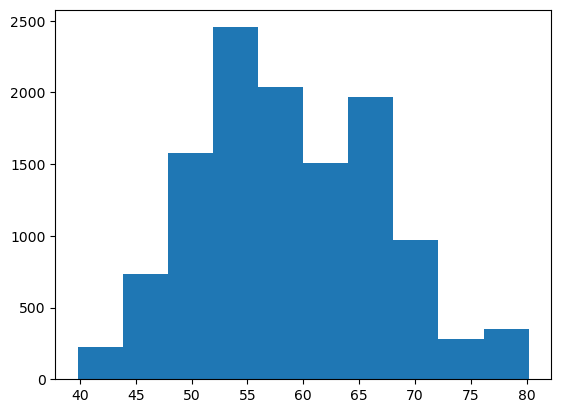

In [55]:
plt.hist(diag_prd_train['Average of Oct-13'])
# plt.show()
# plt.close()
# print(diag_prd_train['Average of Oct-13'].describe())


- slight skew right


- Determine if correlation between numerical variables


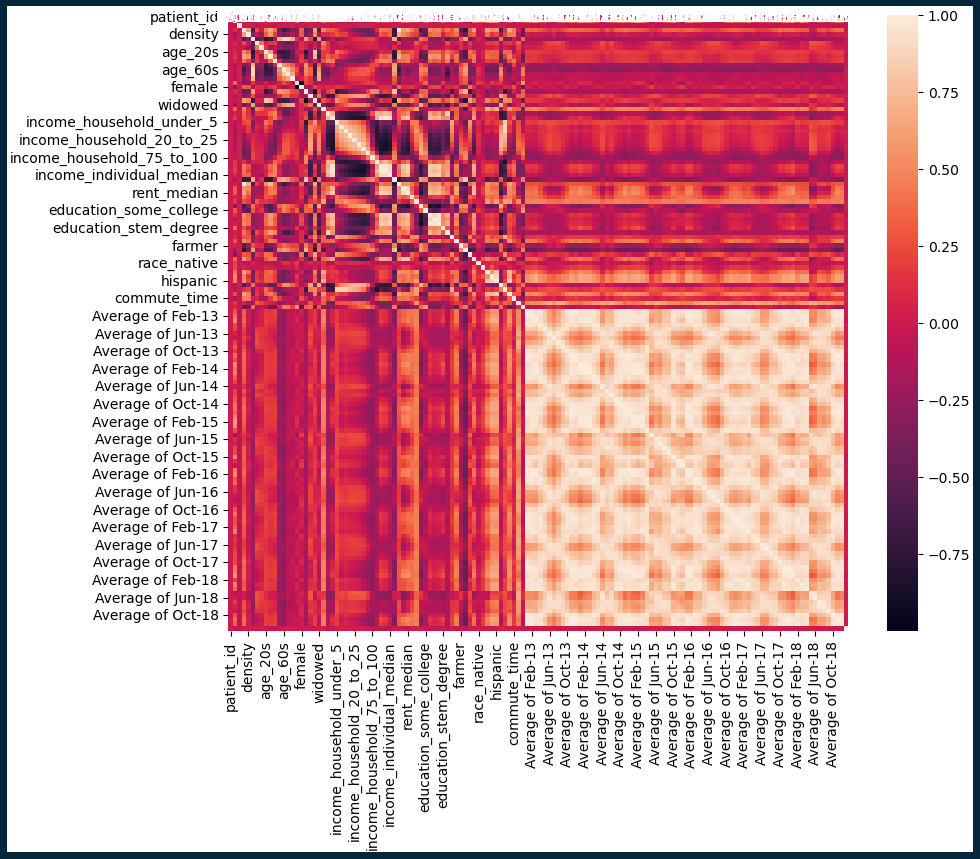

In [56]:

diag_prd_train_num = diag_prd_train.select_dtypes(include = 'number')
cor = diag_prd_train_num.corr()

plt.figure(figsize=(10,8),linewidth=10,edgecolor="#04253a" )
sns.heatmap( cor, annot = True)
plt.show()
plt.close()

- Determine if correlation between climate variables


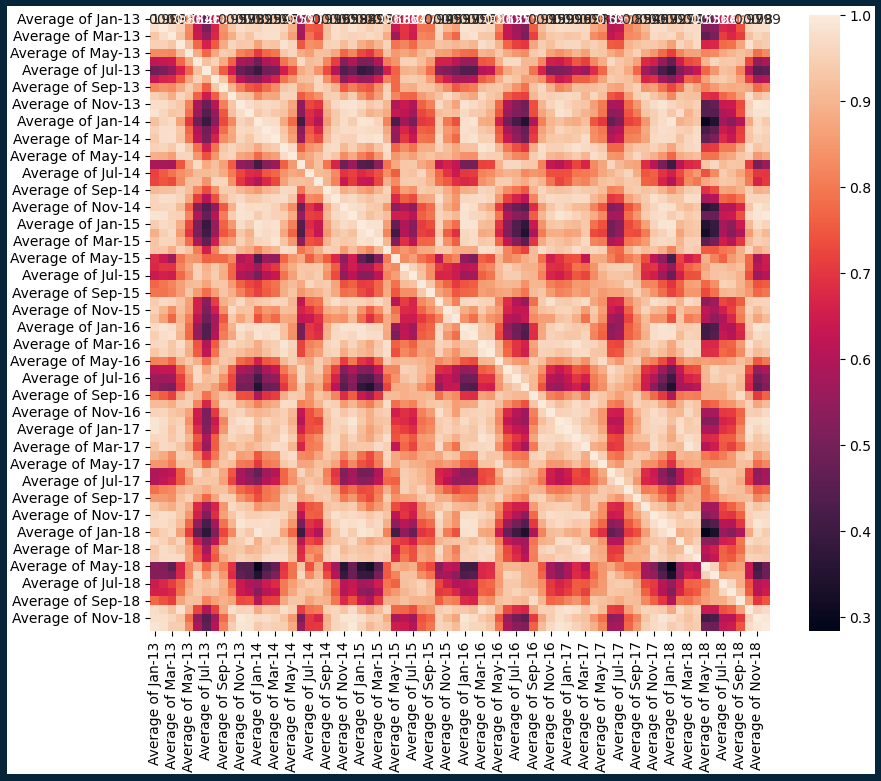

In [57]:

diag_prd_train_climate = diag_prd_train.filter(regex = 'Average')
cor = diag_prd_train_climate.corr()
plt.figure(figsize=(10,8),linewidth=10,edgecolor="#04253a" )
sns.heatmap( cor, annot = True)
plt.show()
plt.close()

- Since only 0.2% of dataset  and slight skew replace with median

In [58]:
value = diag_prd_train['Average of Oct-13'].median()
diag_prd_train['Average of Oct-13'] = diag_prd_train['Average of Oct-13'].fillna(value)

(array([  10.,  390., 2620., 4257., 2653., 1881.,  113.,   97.,   23.,
          94.]),
 array([ 58.14 ,  62.999,  67.858,  72.717,  77.576,  82.435,  87.294,
         92.153,  97.012, 101.871, 106.73 ]),
 <BarContainer object of 10 artists>)

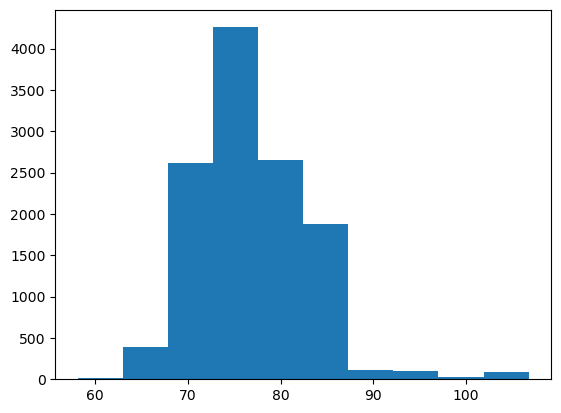

In [59]:

plt.hist(diag_prd_train['Average of Jul-17'])
# plt.show()
# plt.close()

- Skewed right, replace missing values with median


In [60]:
value = diag_prd_train['Average of Jul-17'].median()
diag_prd_train['Average of Jul-17'] = diag_prd_train['Average of Jul-17'].fillna(value)

(array([ 286., 2363., 2156., 1280., 1278., 1157., 1273.,  648., 1429.,
         270.]),
 array([10.21 , 16.249, 22.288, 28.327, 34.366, 40.405, 46.444, 52.483,
        58.522, 64.561, 70.6  ]),
 <BarContainer object of 10 artists>)

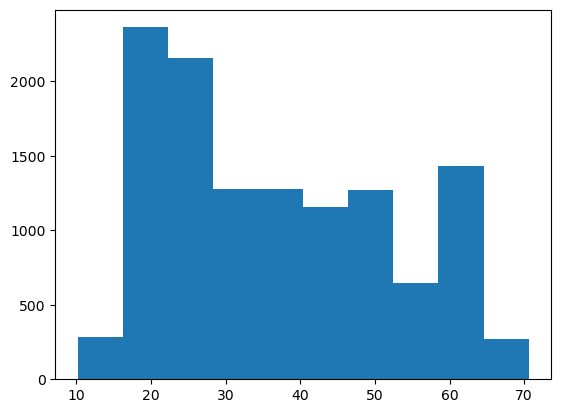

In [61]:

plt.hist(diag_prd_train['Average of Jan-15'])
# plt.show()
# plt.close()

- Skewed right, replace values with median


In [62]:
value = diag_prd_train['Average of Jan-15'].median()
diag_prd_train['Average of Jan-15'] = diag_prd_train['Average of Jan-15'].fillna(value)

(array([ 185.,  566., 1146., 2898., 1852., 1365., 1227., 2223.,  434.,
         244.]),
 array([10.25, 16.42, 22.59, 28.76, 34.93, 41.1 , 47.27, 53.44, 59.61,
        65.78, 71.95]),
 <BarContainer object of 10 artists>)

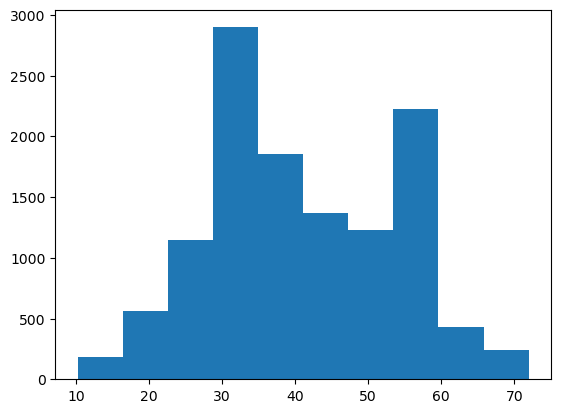

In [63]:

plt.hist(diag_prd_train['Average of Jan-17'])
# plt.show()
# plt.close()

- Slightly skewed to the right, ok to replace with mean

In [64]:

value = diag_prd_train['Average of Jan-17'].mean()
diag_prd_train['Average of Jan-17'] = diag_prd_train['Average of Jan-17'].fillna(value)

(array([  56.,  384.,  743., 2191., 3158., 2053., 2354.,  625.,  126.,
         452.]),
 array([16.14 , 22.264, 28.388, 34.512, 40.636, 46.76 , 52.884, 59.008,
        65.132, 71.256, 77.38 ]),
 <BarContainer object of 10 artists>)

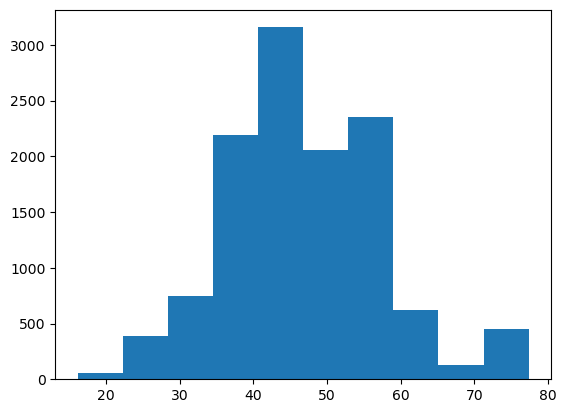

In [65]:

plt.hist(diag_prd_train['Average of Dec-15'])
# plt.show()
# plt.close()

- Not skewed, replace with mean

In [66]:
value = diag_prd_train['Average of Dec-15'].mean()
diag_prd_train['Average of Dec-15'] = diag_prd_train['Average of Dec-15'].fillna(value)

(array([   7.,   97.,  221., 1235., 2780., 3327., 1763., 1418.,  791.,
         503.]),
 array([49.35 , 52.987, 56.624, 60.261, 63.898, 67.535, 71.172, 74.809,
        78.446, 82.083, 85.72 ]),
 <BarContainer object of 10 artists>)

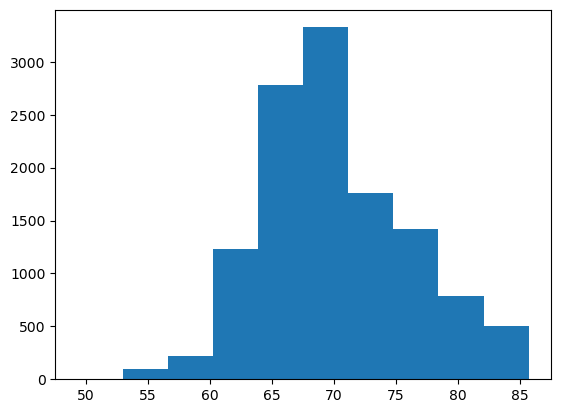

In [67]:

plt.hist(diag_prd_train['Average of Sep-17'])
# plt.show()
# plt.close()

- No obvious skew, ok to replace with mean


In [68]:
value = diag_prd_train['Average of Sep-17'].mean()
diag_prd_train['Average of Sep-17'] = diag_prd_train['Average of Sep-17'].fillna(value)

- Check for missing data resolved


In [69]:
# print(diag_prd_train.isna().sum())

- Find negative values

In [70]:
diag_prd_train_num = diag_prd_train.select_dtypes(include = 'number')
#print(diag_prd_train[diag_prd_train[diag_prd_train_num.columns]<0].count())

- Dec-13: 7 negative values
- Jan-14: 42 negative values

- Step 3. Change Text Data to Numerical

- Revisit dataset info


In [71]:
#print(diag_prd_train.info())
#print(diag_prd_train.describe())
#print(diag_prd_train.value_counts)
#print(diag_prd_train.columns)


- Determine categorical columns

In [72]:
col_to_change = []
for column in diag_prd_train.columns:
    if diag_prd_train[column].dtype == 'object':
        print(column)
        col_to_change.append(column)


payer_type
patient_state
Region
Division
patient_gender
breast_cancer_diagnosis_code
breast_cancer_diagnosis_desc
metastatic_cancer_diagnosis_code


- One-hot encoding: binary vectors (0,1) as a separate feature
- for categorical features that do not have a natural order

In [73]:

# patient gender (2 categories)
# payer_type

one_hot_encoder = OneHotEncoder (sparse_output = False, drop = 'first')
one_hot_encoded = one_hot_encoder.fit_transform(diag_prd_train[['payer_type',
 'patient_gender']])
feature_names = one_hot_encoder.get_feature_names_out(['payer_type', 'patient_gender'])
df_one_hot = pd.DataFrame(one_hot_encoded, columns = feature_names, index = diag_prd_train.index)
diag_prd_train_encoded = pd.concat([diag_prd_train.drop(['payer_type', 'patient_gender'],
axis = 1), df_one_hot], axis = 'columns')

one_hot_encoded = one_hot_encoder.fit_transform(diag_prd_test[['payer_type',
 'patient_gender']])
feature_names = one_hot_encoder.get_feature_names_out(['payer_type', 'patient_gender'])
df_one_hot = pd.DataFrame(one_hot_encoded, columns = feature_names, index = diag_prd_test.index)
diag_prd_test_encoded = pd.concat([diag_prd_test.drop(['payer_type', 'patient_gender'],
axis = 1), df_one_hot], axis = 'columns')

- Target Encoding
- for categorical columns that can have many possible values

In [74]:

#Region
#Division
#patient_state
#breast_cancer_diag_code
#breast_cancer_diag_desc
#metastatic_cancer_diag_code

encoder = TargetEncoder()
diag_prd_train_target_encoded = diag_prd_train_encoded.copy()

cat_cols = ['Region', 'Division', 'patient_state',
                        'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
                        'metastatic_cancer_diagnosis_code']
#diag_prd_train_target_encoded = diag_prd_train_target_encoded.reset_index(drop = True)
diag_prd_train_target_encoded["patient_state"] = [str(i).replace(" ", "") for i in diag_prd_train_target_encoded["patient_state"]]

for col in cat_cols:
    diag_prd_train_target_encoded[col] = encoder.fit_transform(
    diag_prd_train_target_encoded[col],diag_prd_train_target_encoded['metastatic_diagnosis_period'])
#impute missing values with most frequent value in each column

diag_prd_test_target_encoded = diag_prd_test_encoded.copy()

cat_cols = ['Region', 'Division', 'patient_state',
                        'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
                        'metastatic_cancer_diagnosis_code']
#diag_prd_train_target_encoded = diag_prd_train_target_encoded.reset_index(drop = True)
diag_prd_test_target_encoded["patient_state"] = [str(i).replace(" ", "") for i in diag_prd_test_target_encoded["patient_state"]]

for col in cat_cols:
    diag_prd_test_target_encoded[col] = diag_prd_train_target_encoded[col]

for col in cat_cols:
    #print (col)
    value = diag_prd_train_target_encoded[col].mode()[0]
    #print(value)
    diag_prd_test_target_encoded[col].fillna(value, inplace = True)
    print(diag_prd_test_target_encoded[col].isna().sum())

0
0
0
0
0
0


- Check which numeric columns has outliers/non-normal distribution

In [75]:

diag_prd_train_num = diag_prd_train.select_dtypes(include = 'number')

col_to_normalize = []

for col in diag_prd_train_num:
     if col not in col_to_change:
        q1 = diag_prd_train[col].quantile(0.25)
        q3 = diag_prd_train[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5*iqr)
        upper_bound = q3 + (1.5*iqr)
        for value in diag_prd_train[col]:
            if value < lower_bound:
                col_to_normalize.append(col)
                break
            if value > upper_bound:
                col_to_normalize.append(col)
                break

#print(col_to_normalize)

- Normalize columns


In [76]:

#StandardScaler
standard_scaler = StandardScaler()
diag_prd_train[col_to_normalize] = standard_scaler.fit_transform(diag_prd_train[col_to_normalize])

#print(diag_prd_train[col_to_normalize])


## 4. Feature Engineering

- Feature Selection: selects only dominating or relevant features in dataset
- uses algorithms to determine which features have most impact or relation to target variable
- can improve machine learning model's accuracy
- 30-50% of total features in dataset

### WITH CLIMATE DATA

- Univariate feature selection: removes all features whose variance doesn't meet particular threshold value


In [77]:
diag_prd_train_target_encoded = diag_prd_train_target_encoded.reset_index()
met_dg_prd = diag_prd_train_target_encoded.pop('metastatic_diagnosis_period')
diag_prd_train_target_encoded['metastatic_diagnosis_period'] = met_dg_prd
diag_prd_train_target_encoded = diag_prd_train_target_encoded.reset_index()

X_train = diag_prd_train_target_encoded.iloc[:,:-1]

Y_train = diag_prd_train_target_encoded.iloc[:,-1]

k_best = 50
lasso = Lasso(alpha =0.1)
lasso.fit(X_train, Y_train)
coeff = np.abs(lasso.coef_)
selected_features_f_train = diag_prd_train_target_encoded.columns[:-1][np.argsort(coeff)[::-1]][:k_best]

print(selected_features_f_train)

Index(['payer_type_None', 'payer_type_MEDICARE ADVANTAGE',
       'payer_type_MEDICAID', 'Average of Oct-18', 'Average of May-17',
       'Average of Mar-16', 'Average of Aug-17', 'Average of Jul-18',
       'Average of Aug-13', 'Average of Sep-13', 'Average of Apr-17',
       'Average of Jul-17', 'Average of Mar-13', 'Average of May-15',
       'Average of Nov-13', 'Average of Sep-18', 'Average of May-16',
       'Average of Jun-15', 'Average of Jun-17', 'Average of Jul-14',
       'Average of Aug-15', 'Average of Apr-14',
       'breast_cancer_diagnosis_code', 'income_household_25_to_35',
       'Average of Mar-14', 'age_50s', 'income_household_35_to_50',
       'Average of Jun-18', 'income_household_75_to_100',
       'income_household_10_to_15', 'Average of Mar-17', 'Average of Jan-13',
       'Average of Jun-14', 'never_married', 'Average of Apr-18',
       'age_10_to_19', 'Average of Aug-18', 'Average of Mar-18',
       'Average of Dec-16', 'health_uninsured', 'Average of Sep-14'

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.131e+07, tolerance: 1.452e+04
  model = cd_fast.enet_coordinate_descent(


## 5. Train Machine Learning Model

In [78]:
vec = DictVectorizer()
selected_features_dict = diag_prd_train_target_encoded[selected_features_f_train].to_dict(orient = 'records')
selected_features_vec_train = vec.fit_transform(selected_features_dict).toarray()

- RandomForest Model

In [79]:
clf = RandomForestClassifier(random_state= 22)
clf.fit(selected_features_vec_train, Y_train)

param_grid = {  
           "n_estimators" : [10, 100, 1000],  
           "max_depth" : [5, 100, 500],  
           "min_samples_leaf" : [1, 20, 40]}  

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'min_samples_leaf': [1, 2, 4],
                "max_features": [0.5, 1,"sqrt"],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}


rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,
                                n_iter = 2, cv = 5, verbose= 2, random_state=42, n_jobs = -1)

In [80]:
predictions = clf.predict(selected_features_vec_train)
accuracy = accuracy_score(Y_train, predictions)
print('Accuracy RF: ' + str(round(accuracy,4)))

Accuracy RF: 0.667


- NA in test_target_encoded
- fill with mean/median for missing values


In [81]:
for column in selected_features_f_train:
    value = diag_prd_test_target_encoded[column].mean()
    diag_prd_test_target_encoded[column] = diag_prd_test_target_encoded[column].fillna(value)

- Check Accuracy


In [82]:
vec = DictVectorizer()
selected_features_dict = diag_prd_test_target_encoded[selected_features_f_train].to_dict(orient = 'records')

- Export Predicted Values to Excel


In [83]:
selected_features_vec_test = vec.fit_transform(selected_features_dict).toarray()
predictions = clf.predict(selected_features_vec_test)
predictions = predictions.tolist()
solutions_with_climate = pd.DataFrame ({'patient_id':diag_prd_test['patient_id'], 'metastatic_diagnosis_period': predictions})
solutions_with_climate.to_csv('solutions_climate.csv', index= False)

# 4. Feature Engineering

Feature Selection: selects only dominating or relevant features in dataset uses algorithms to determine which features have most impact or relation to
target variable
can improve machine learning model's accuracy

Univariate feature selection: removes all features whose variance doesn't


### WITHOUT CLIMATE DATA

- Drop climate data since it is secondary goal
- Secondary goal - to see if climate patterns impact proper diagnosis and treatment

In [84]:
climate_columns = diag_prd_train_target_encoded.columns[diag_prd_train_target_encoded.columns.str.contains('Average of')]
diag_prd_train_target_encoded.drop(climate_columns,axis=1, inplace = True)

climate_columns = diag_prd_test_target_encoded.columns[diag_prd_test_target_encoded.columns.str.contains('Average of')]
diag_prd_test_target_encoded.drop(climate_columns,axis=1, inplace = True)

In [85]:
X_train = diag_prd_train_target_encoded.iloc[:,:-1]

Y_train = diag_prd_train_target_encoded.iloc[:,-1]

In [86]:
diag_prd_train_target_encoded.isna().sum()
k_best = 50
lasso = Lasso(alpha =0.1)
lasso.fit(X_train, Y_train)
coeff = np.abs(lasso.coef_)
selected_features_f_train = diag_prd_train_target_encoded.columns[:-1][np.argsort(coeff)[::-1]][:k_best]

print(selected_features_f_train)

Index(['payer_type_None', 'payer_type_MEDICARE ADVANTAGE',
       'payer_type_MEDICAID', 'age_50s', 'income_household_25_to_35',
       'breast_cancer_diagnosis_code', 'income_household_10_to_15',
       'income_household_15_to_20', 'age_10_to_19',
       'income_household_35_to_50', 'education_graduate', 'health_uninsured',
       'never_married', 'male', 'age_under_10', 'age_70s', 'age_over_80',
       'age_30s', 'patient_age', 'Division', 'disabled',
       'metastatic_cancer_diagnosis_code', 'divorced', 'commute_time',
       'farmer', 'home_ownership', 'patient_state', 'race_other', 'veteran',
       'income_household_75_to_100', 'education_stem_degree', 'self_employed',
       'race_black', 'income_household_six_figure', 'hispanic',
       'income_household_100_to_150', 'race_asian', 'income_household_5_to_10',
       'unemployment_rate', 'education_less_highschool',
       'education_highschool', 'widowed', 'labor_force_participation',
       'education_bachelors', 'rent_burden'

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.056e+07, tolerance: 1.452e+04
  model = cd_fast.enet_coordinate_descent(


- Address missing values in test dataset
- Fill missing values with mean of column


In [87]:
for column in selected_features_f_train:
    value = diag_prd_test_target_encoded[column].mean()
    diag_prd_test_target_encoded[column] = diag_prd_test_target_encoded[column].fillna(value)

## 5. Train Machine Learning Model

In [88]:
vec = DictVectorizer()
selected_features_dict = diag_prd_train_target_encoded[selected_features_f_train].to_dict(orient = 'records')
selected_features_vec_train = vec.fit_transform(selected_features_dict).toarray()

predictions = clf.predict(selected_features_vec_train)
accuracy = accuracy_score(Y_train, predictions)
print(accuracy)

0.23371489747179444


- Check Accuracy


In [89]:
vec = DictVectorizer()
selected_features_dict = diag_prd_test_target_encoded[selected_features_f_train].to_dict(orient = 'records')
# print(diag_prd_test_target_encoded[selected_features_f_train].isna().sum())

- Export Predicted Values to Excel


In [90]:
selected_features_vec_test = vec.fit_transform(selected_features_dict).toarray()
predictions = clf.predict(selected_features_vec_test)
predictions = predictions.tolist()
solutions = pd.DataFrame ({'patient_id':diag_prd_test['patient_id'], 'metastatic_diagnosis_period': predictions})
solutions.to_csv('solutions.csv', index= False)